In [1]:
import numpy as np
import pandas as pd
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
#column names were to below names
columns = ["user_id","item_id","rating","timestamp"]
df = pd.read_csv('ml-100k/u.data',sep='\t',names=columns)
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
#no of unique users who gave movie reviews

df['user_id'].nunique()

943

In [5]:
#no of unique movies 

df['item_id'].nunique()

1682

In [6]:
 movies_title = pd.read_csv("ml-100k/u.item",sep="\|",header=None)

In [7]:
movies_title.shape

(1682, 24)

In [8]:
movies_title = movies_title[[0,1]]
movies_title.columns = ['item_id','title']
movies_title.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [9]:
df = pd.merge(df,movies_title,on="item_id")

In [10]:
df.tail()

,user_id,item_id,rating,timestamp,title
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."
99999,655,1641,3,887427810,Dadetown (1995)


# Exploratory Data Analysis

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [12]:
#average rating of movies

df.groupby('title').mean()['rating']

title
'Til There Was You (1997)                2.333333
1-900 (1994)                             2.600000
101 Dalmatians (1996)                    2.908257
12 Angry Men (1957)                      4.344000
187 (1997)                               3.024390
                                           ...   
Young Guns II (1990)                     2.772727
Young Poisoner's Handbook, The (1995)    3.341463
Zeus and Roxanne (1997)                  2.166667
unknown                                  3.444444
Á köldum klaka (Cold Fever) (1994)       3.000000
Name: rating, Length: 1664, dtype: float64

In [13]:
#sorted by descending order
df.groupby('title').mean()['rating'].sort_values(ascending=False)

title
Marlene Dietrich: Shadow and Light (1996)       5.0
Prefontaine (1997)                              5.0
Santa with Muscles (1996)                       5.0
Star Kid (1997)                                 5.0
Someone Else's America (1995)                   5.0
                                               ... 
Touki Bouki (Journey of the Hyena) (1973)       1.0
JLG/JLG - autoportrait de décembre (1994)       1.0
Daens (1992)                                    1.0
Butterfly Kiss (1995)                           1.0
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
Name: rating, Length: 1664, dtype: float64

In [14]:
df.groupby('title').count()

,user_id,item_id,rating,timestamp
title,,,,
'Til There Was You (1997),9,9,9,9
1-900 (1994),5,5,5,5
101 Dalmatians (1996),109,109,109,109
12 Angry Men (1957),125,125,125,125
187 (1997),41,41,41,41
...,...,...,...,...
Young Guns II (1990),44,44,44,44
"Young Poisoner's Handbook, The (1995)",41,41,41,41
Zeus and Roxanne (1997),6,6,6,6


In [15]:
# sum of all ratings by desceding order (hgiher rating means more number of people have rated for this movie)

df.groupby('title').count()['rating'].sort_values(ascending= False)

title
Star Wars (1977)                              583
Contact (1997)                                509
Fargo (1996)                                  508
Return of the Jedi (1983)                     507
Liar Liar (1997)                              485
                                             ... 
Man from Down Under, The (1943)                 1
Marlene Dietrich: Shadow and Light (1996)       1
Mat' i syn (1997)                               1
Mille bolle blu (1993)                          1
Á köldum klaka (Cold Fever) (1994)              1
Name: rating, Length: 1664, dtype: int64

In [16]:
ratings = pd.DataFrame(df.groupby('title').mean()['rating'])
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [17]:
ratings['count of rating'] = pd.DataFrame(df.groupby('title').count()['rating'])


In [18]:
ratings.head()

,rating,count of rating
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [19]:
ratings.sort_values(by='rating')

,rating,count of rating
title,,
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
Butterfly Kiss (1995),1.0,1
Daens (1992),1.0,1
JLG/JLG - autoportrait de décembre (1994),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1
...,...,...
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
Santa with Muscles (1996),5.0,2


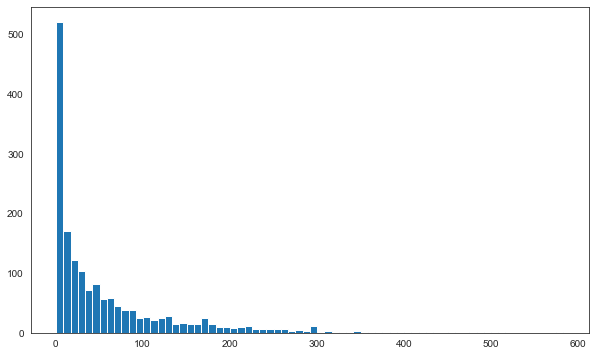

In [20]:
#this histogram shows that no.of ratings between 0 - 100 rating has occured more number of times which is not at all useful

plt.figure(figsize =(10,6))

plt.hist(ratings['count of rating'],bins=70)
plt.show()

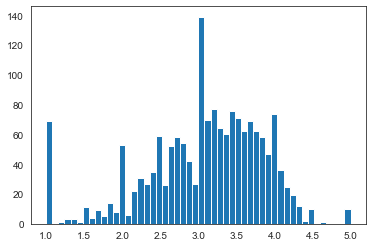

In [21]:
# x - axis -> average rating
#  y - axis -> frequency
plt.hist(ratings['rating'],bins=50)
plt.show()

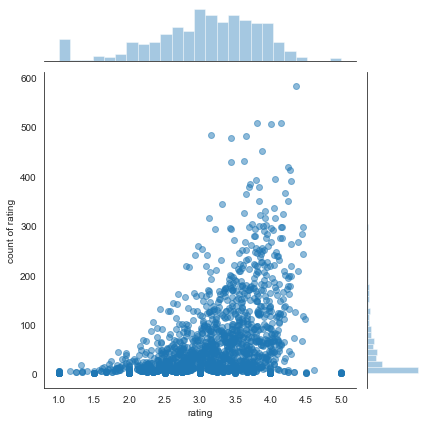

In [22]:
sns.jointplot(x='rating',y='count of rating',data = ratings,alpha= 0.5)

# Movie Recommendation System

In [23]:
df.head(10)

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)
5,296,242,4,884196057,Kolya (1996)
6,34,242,5,888601628,Kolya (1996)
7,271,242,4,885844495,Kolya (1996)
8,201,242,4,884110598,Kolya (1996)
9,209,242,4,883589606,Kolya (1996)


In [24]:
#it shows the ratings of movies given by each user

movie_matrix = df.pivot_table(index='user_id',columns ='title',values= 'rating')
movie_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [25]:
starwars_user_rating = movie_matrix['Star Wars (1977)']
starwars_user_rating

user_id
1      5.0
2      5.0
3      NaN
4      5.0
5      4.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 943, dtype: float64

In [26]:
#NaN values represent that user has not reviewed both starwars and the similar movies
similar_to_starwars =  movie_matrix.corrwith(starwars_user_rating)
similar_to_starwars

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [27]:
#converting to dataframe

corr_starwars = pd.DataFrame(similar_to_starwars,columns=['correlation'])

In [28]:
#dropping the NaN values

corr_starwars.dropna(inplace=True)

In [29]:
corr_starwars.sort_values('correlation',ascending=False)

,correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
...,...
Roseanna's Grave (For Roseanna) (1997),-1.0
For Ever Mozart (1996),-1.0
American Dream (1990),-1.0


In [30]:
corr_starwars = corr_starwars.join(ratings['count of rating'])
corr_starwars

,correlation,count of rating
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
...,...,...
Young Guns (1988),0.186377,101
Young Guns II (1990),0.228615,44
"Young Poisoner's Handbook, The (1995)",-0.007374,41


In [31]:
ratings.head()

,rating,count of rating
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [35]:
corr_starwars[corr_starwars['count of rating']>100].sort_values('correlation',ascending = False)

,correlation,count of rating
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


# Recommend Movies

In [48]:
def recommend(movie_name):
    
    movie_user_rating = movie_matrix[movie_name]
    similar_movies = movie_matrix.corrwith(movie_user_rating)
    
    corr_movie = pd.DataFrame(similar_movies,columns=['correlation'])
    corr_movie.dropna(inplace=True)
    
    corr_movie = corr_movie.join(ratings['count of rating'])
    
    recommendation = corr_movie[corr_movie['count of rating']>100].sort_values('correlation',ascending = False)
    return recommendation

In [49]:
recommend('First Wives Club, The (1996)')

,correlation,count of rating
title,,
"First Wives Club, The (1996)",1.000000,160
Young Guns (1988),0.569725,101
Little Women (1994),0.526990,102
Arsenic and Old Lace (1944),0.521563,115
"Manchurian Candidate, The (1962)",0.512639,131
...,...,...
Cool Hand Luke (1967),-0.242016,164
Big Night (1996),-0.284662,171
"Nightmare Before Christmas, The (1993)",-0.303609,143
